In [ ]:
!pip install kaggle
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:07<00:00, 24.5MB/s]
100% 149M/149M [00:07<00:00, 20.5MB/s]


In [ ]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
tr_df = train_df('/content/Training')

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_1217.jpg,notumor
1,/content/Training/notumor/Tr-no_0358.jpg,notumor
2,/content/Training/notumor/Tr-no_0674.jpg,notumor
3,/content/Training/notumor/Tr-no_0801.jpg,notumor
4,/content/Training/notumor/Tr-no_1325.jpg,notumor
...,...,...
5707,/content/Training/meningioma/Tr-me_0477.jpg,meningioma
5708,/content/Training/meningioma/Tr-me_1304.jpg,meningioma
5709,/content/Training/meningioma/Tr-me_0510.jpg,meningioma
5710,/content/Training/meningioma/Tr-me_0792.jpg,meningioma


In [ ]:
ts_df = test_df('/content/Testing')

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0167.jpg,notumor
1,/content/Testing/notumor/Te-no_0039.jpg,notumor
2,/content/Testing/notumor/Te-no_0248.jpg,notumor
3,/content/Testing/notumor/Te-no_0250.jpg,notumor
4,/content/Testing/notumor/Te-no_0237.jpg,notumor
...,...,...
1306,/content/Testing/meningioma/Te-me_0151.jpg,meningioma
1307,/content/Testing/meningioma/Te-me_0117.jpg,meningioma
1308,/content/Testing/meningioma/Te-me_0109.jpg,meningioma
1309,/content/Testing/meningioma/Te-me_0236.jpg,meningioma


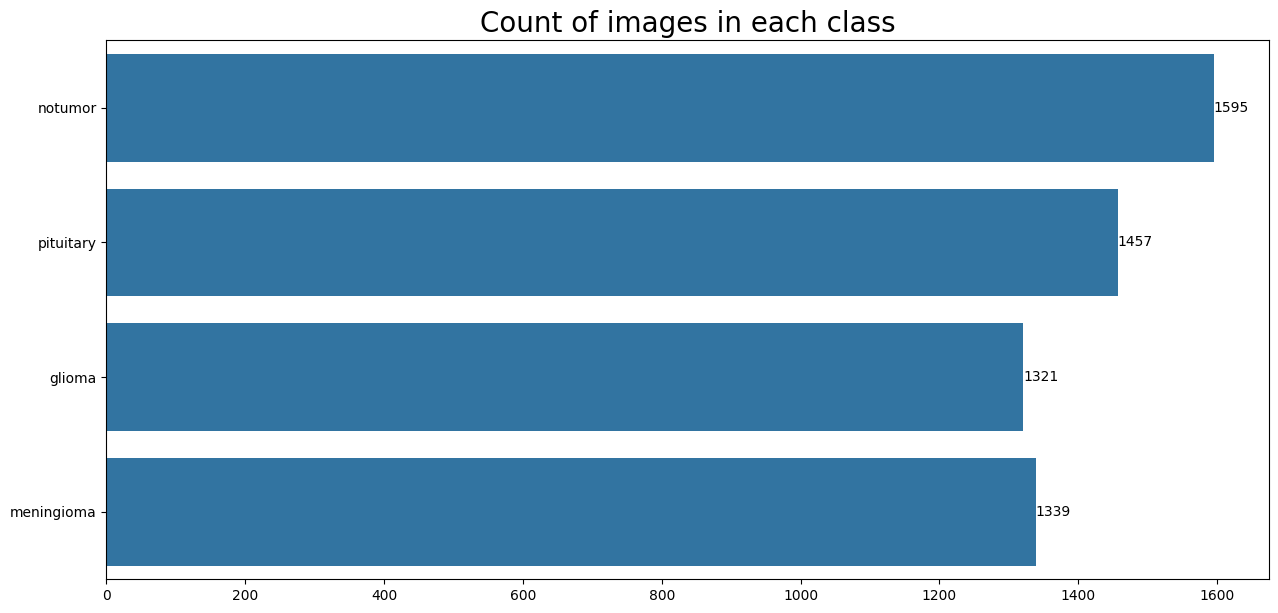

In [ ]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

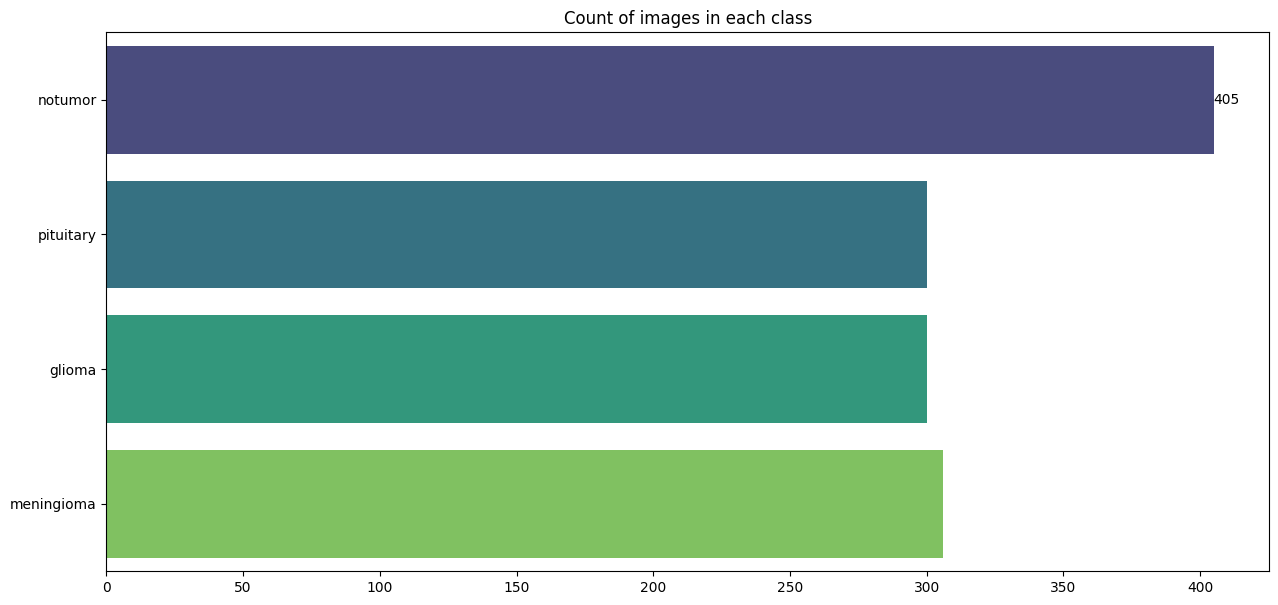

In [ ]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
991,/content/Testing/glioma/Te-gl_0182.jpg,glioma
1023,/content/Testing/meningioma/Te-me_0036.jpg,meningioma
466,/content/Testing/pituitary/Te-pi_0241.jpg,pituitary
1078,/content/Testing/meningioma/Te-me_0304.jpg,meningioma
814,/content/Testing/glioma/Te-gl_0116.jpg,glioma
...,...,...
764,/content/Testing/glioma/Te-gl_0267.jpg,glioma
254,/content/Testing/notumor/Te-noTr_0006.jpg,notumor
978,/content/Testing/glioma/Te-gl_0146.jpg,glioma
1199,/content/Testing/meningioma/Te-me_0018.jpg,meningioma


In [ ]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


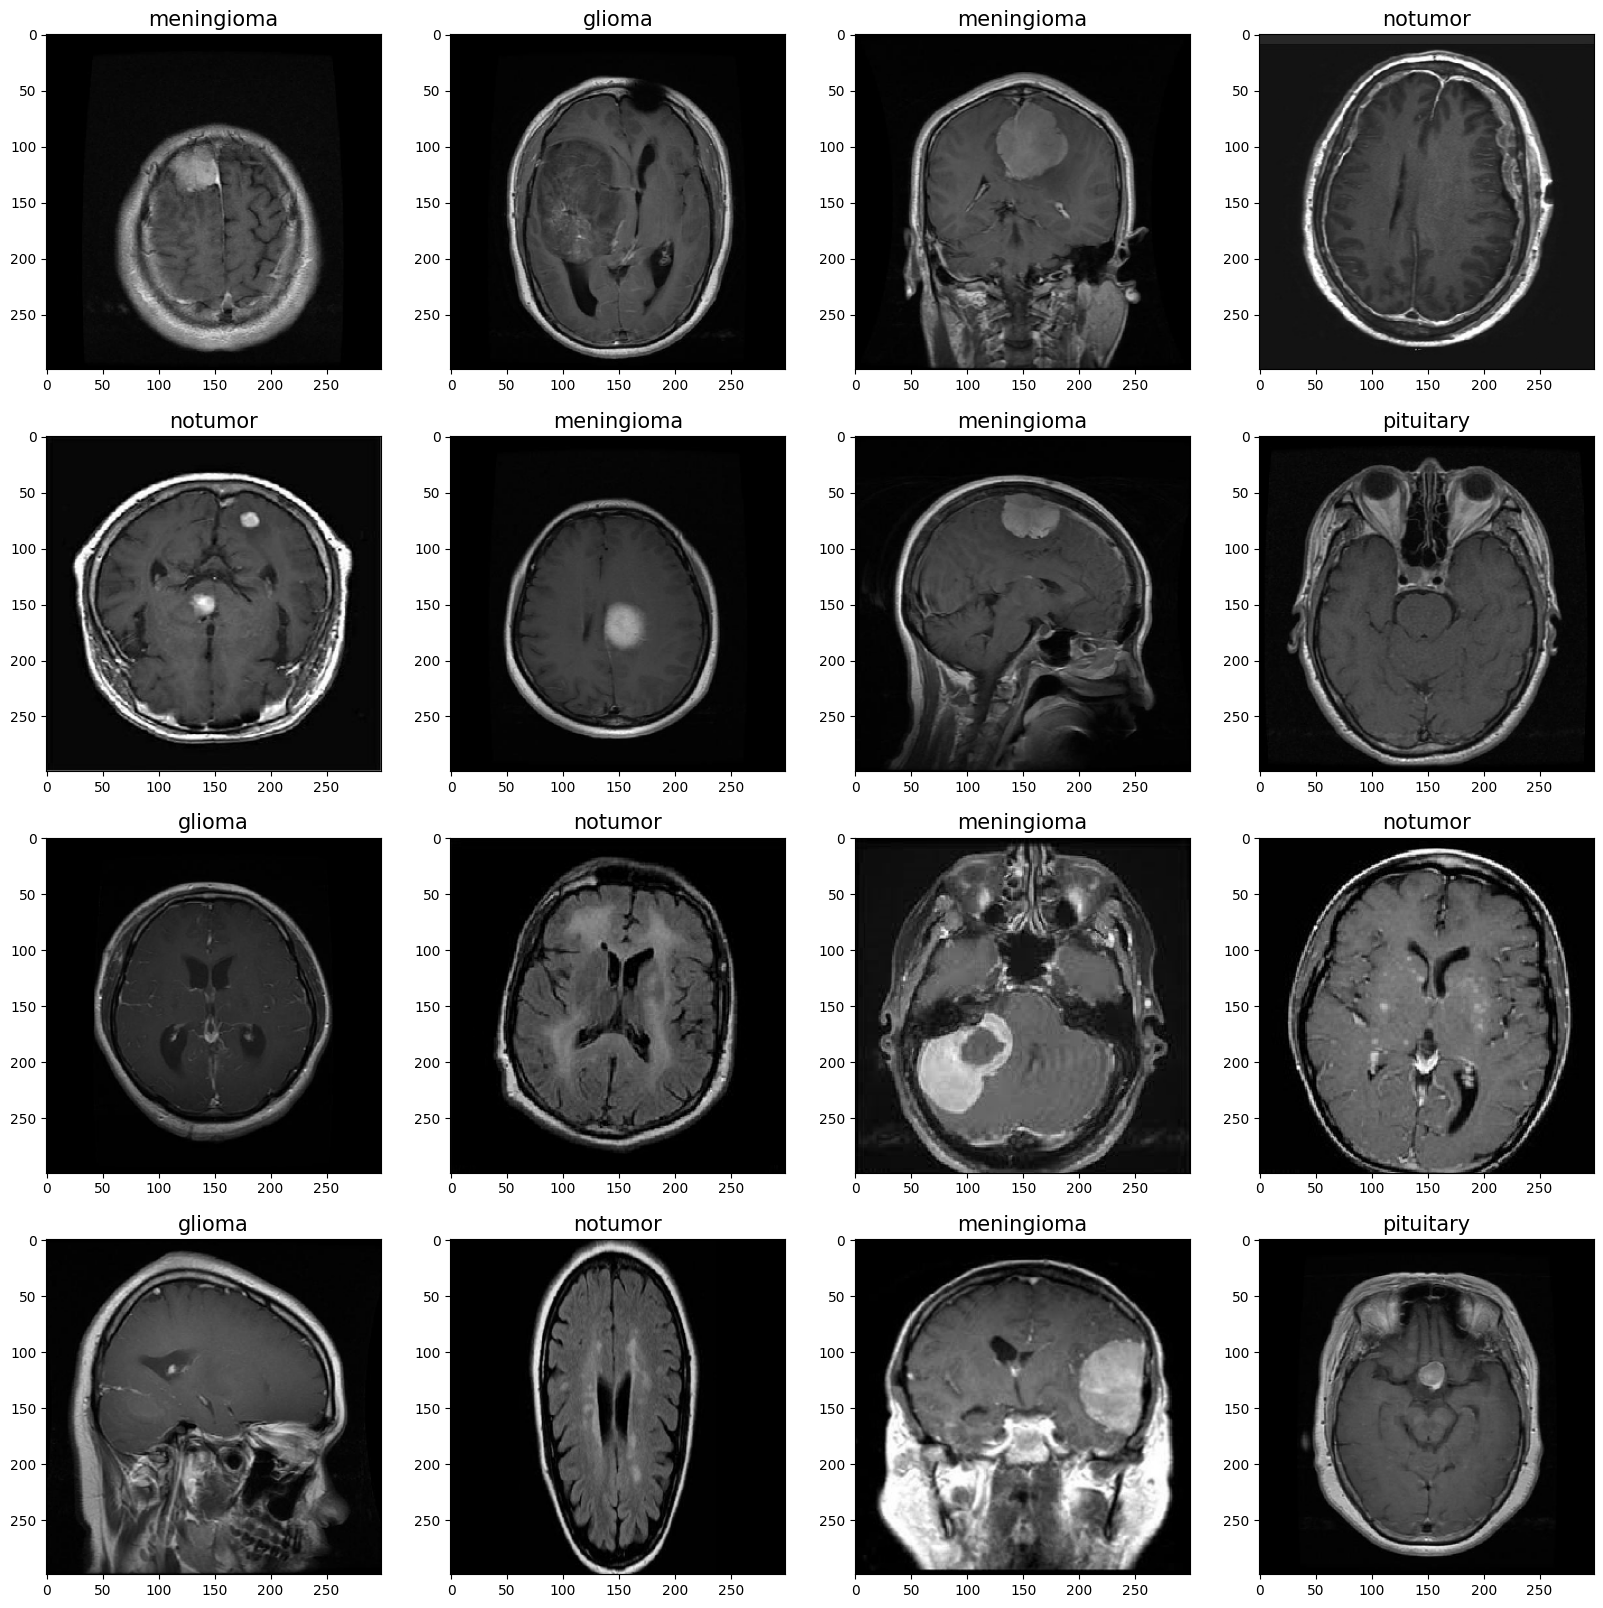

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

# Set input image shape
img_shape = (299, 299, 3)

# Load the base model with pretrained ImageNet weights
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='max'
)

# Freeze the base model to prevent updating pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Define the custom model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')  # Adjust output layer for your task
])

# Compile the model
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# Display model summary
model.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

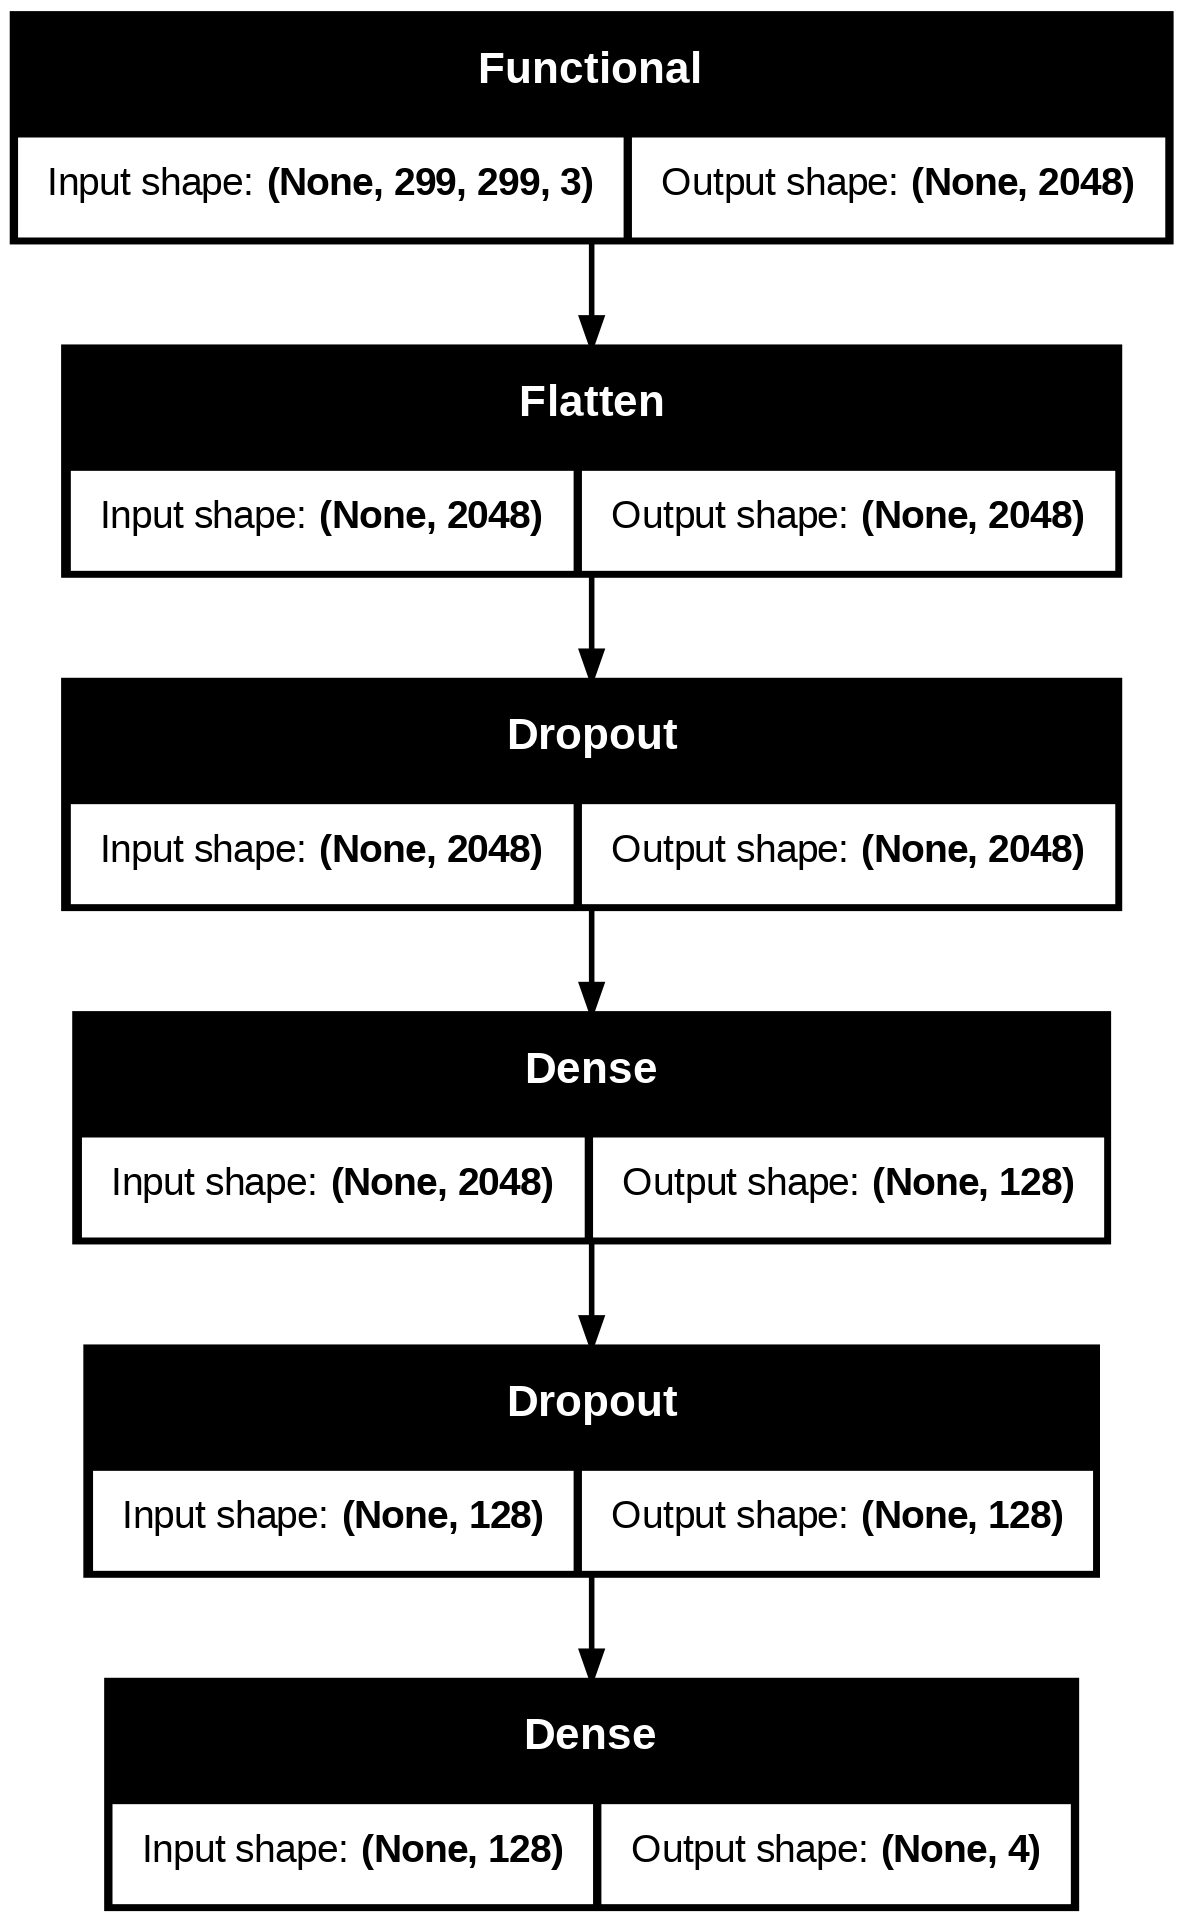

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 105s 435ms/step - accuracy: 0.5990 - loss: 1.2235 - precision: 0.6381 - recall: 0.5435 - val_accuracy: 0.8015 - val_loss: 0.5133 - val_precision: 0.8227 - val_recall: 0.7649
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 293ms/step - accuracy: 0.8155 - loss: 0.4882 - precision: 0.8452 - recall: 0.7865 - val_accuracy: 0.8336 - val_loss: 0.4416 - val_precision: 0.8512 - val_recall: 0.8122
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 47s 264ms/step - accuracy: 0.8429 - loss: 0.4255 - precision: 0.8665 - recall: 0.8184 - val_accuracy: 0.8550 - val_loss: 0.3911 - val_precision: 0.8637 - val_recall: 0.8321
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step - accuracy: 0.8661 - loss: 0.3561 - precision: 0.8871 - recall: 0.8504 - val_accuracy: 0.8580 - val_loss: 0.3715 - val_precision: 0.8806 - val_recall: 0.8336
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - accuracy: 0.8895 - loss: 0.3048 - precision: 0.9005 - recall: 0.8764 - val_accuracy: 0.839

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

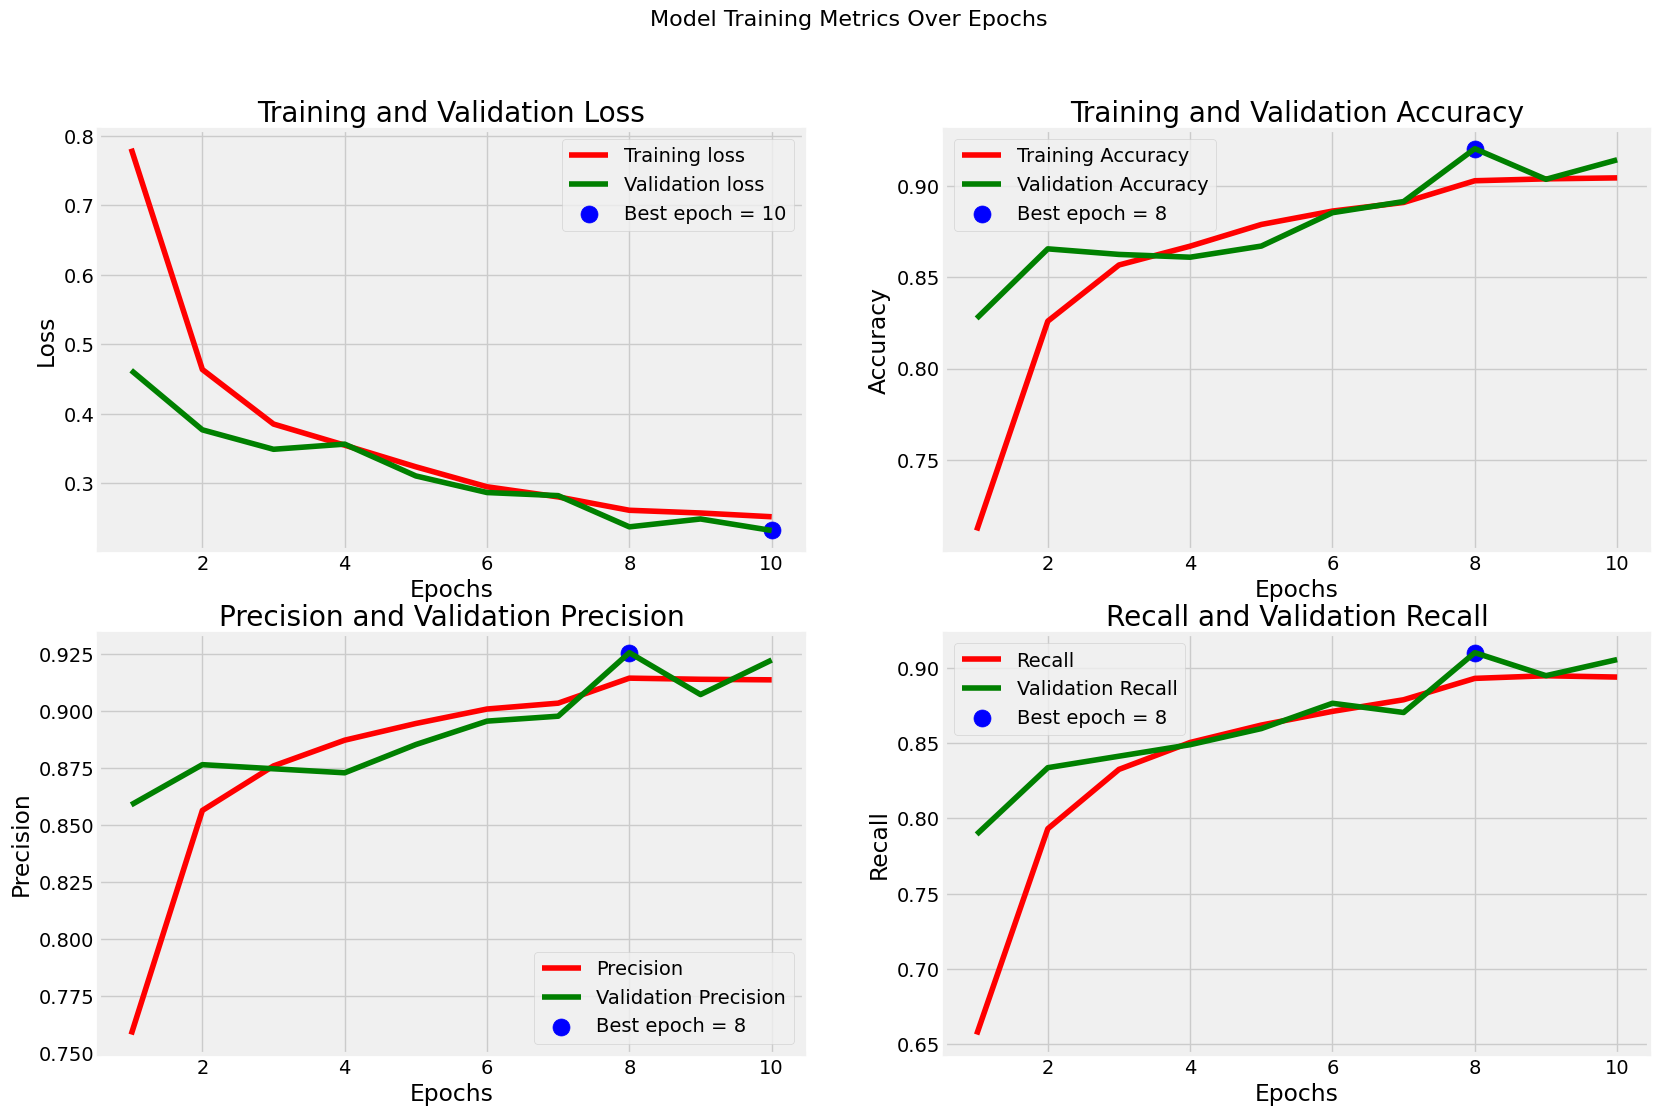

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 247ms/step - accuracy: 0.9391 - loss: 0.1669 - precision: 0.9427 - recall: 0.9362
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.8967 - loss: 0.2625 - precision: 0.9055 - recall: 0.8870
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8855 - loss: 0.2712 - precision: 0.8987 - recall: 0.8768
Train Loss: 0.1537
Train Accuracy: 94.56%
--------------------
Validation Loss: 0.2292
Validation Accuracy: 91.76%
--------------------
Test Loss: 0.2421
Test Accuracy: 91.01%


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step


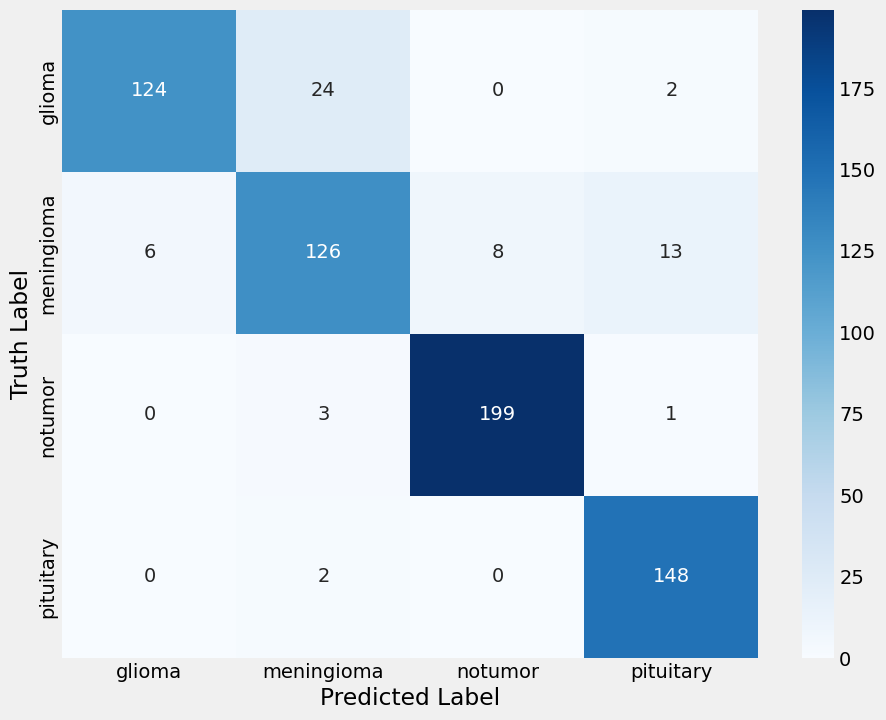

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       150
           1       0.81      0.82      0.82       153
           2       0.96      0.98      0.97       203
           3       0.90      0.99      0.94       150

    accuracy                           0.91       656
   macro avg       0.91      0.90      0.90       656
weighted avg       0.91      0.91      0.91       656



In [ ]:
def predict_with_segmentation(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    import tensorflow.keras.backend as K
    from tensorflow.keras.models import Model
    from PIL import Image
    import cv2

    # Load and preprocess the image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    input_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(input_array)
    predicted_class = np.argmax(predictions[0])
    label = list(class_dict.keys())
    probs = list(predictions[0])

    # Grad-CAM implementation
    grad_model = Model(
        inputs=model.input,
        outputs=[model.get_layer('xception').output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(input_array)
        loss = predictions[:, predicted_class]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Resize heatmap to original image size
    heatmap = cv2.resize(heatmap.numpy(), (img_array.shape[1], img_array.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on the original image
    overlay_img = cv2.addWeighted(img_array, 0.6, heatmap_colored, 0.4, 0)

    # Plot results
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 2, 1)
    plt.imshow(resized_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(heatmap, cmap='jet')
    plt.title("Segmentation Heatmap")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.imshow(overlay_img)
    plt.title("Overlay")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    bars = plt.barh(label, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.title("Prediction Probabilities")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


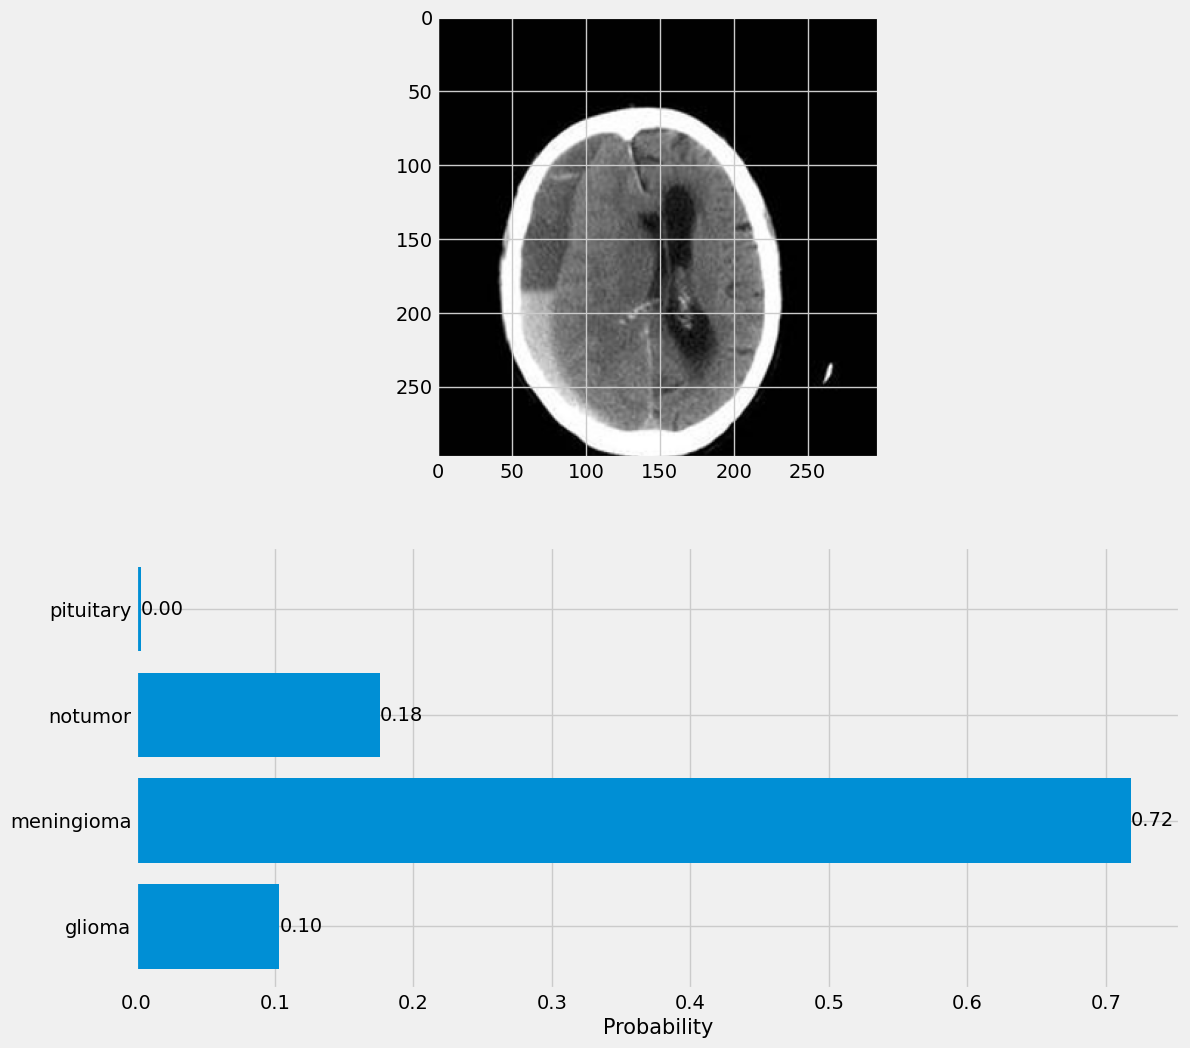

In [ ]:
predict('/content/Testing/notumor/Te-noTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


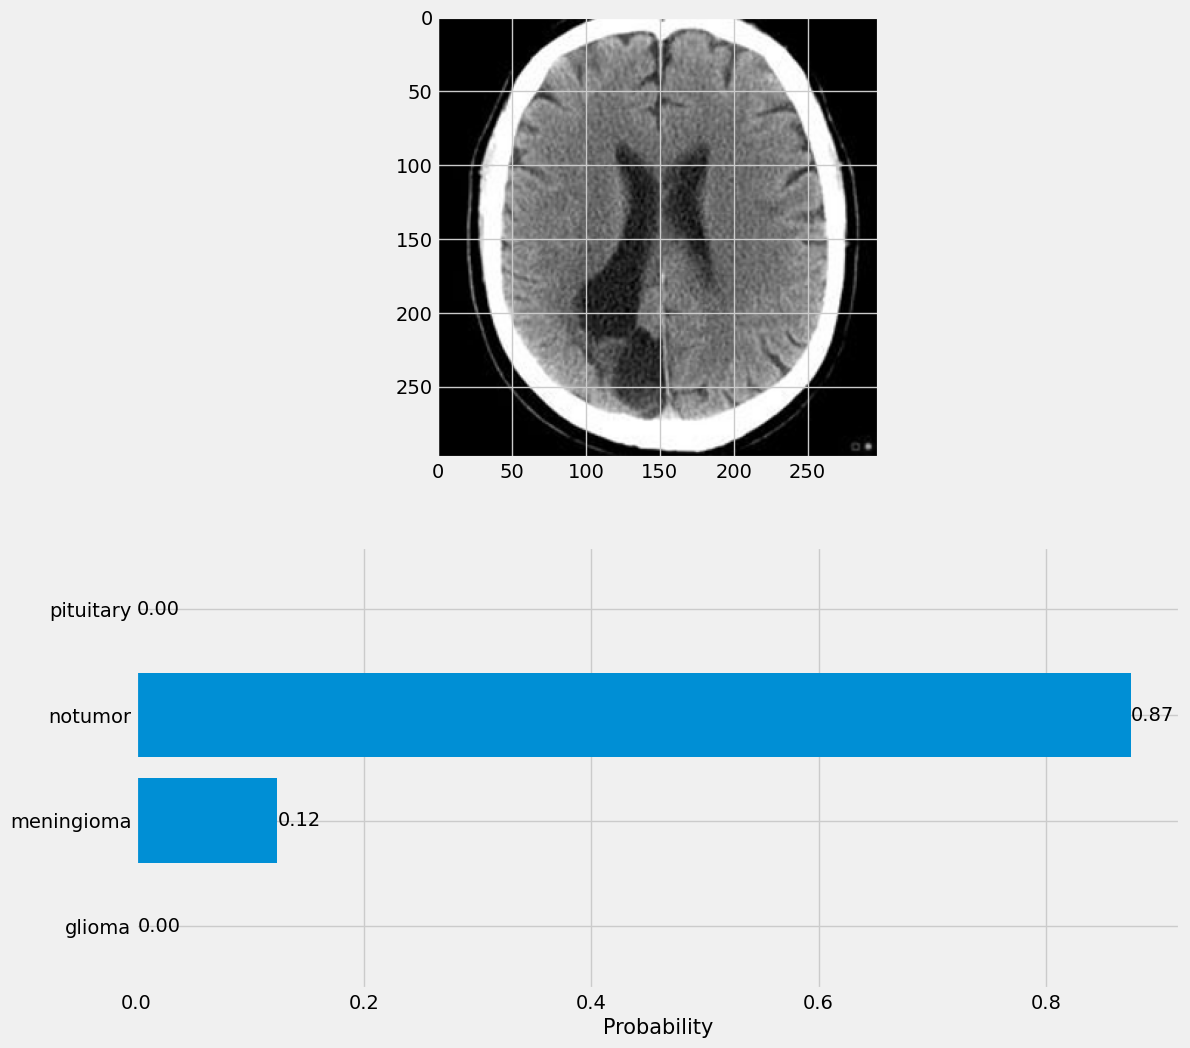

In [ ]:
predict('/content/Testing/notumor/Te-noTr_0009.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


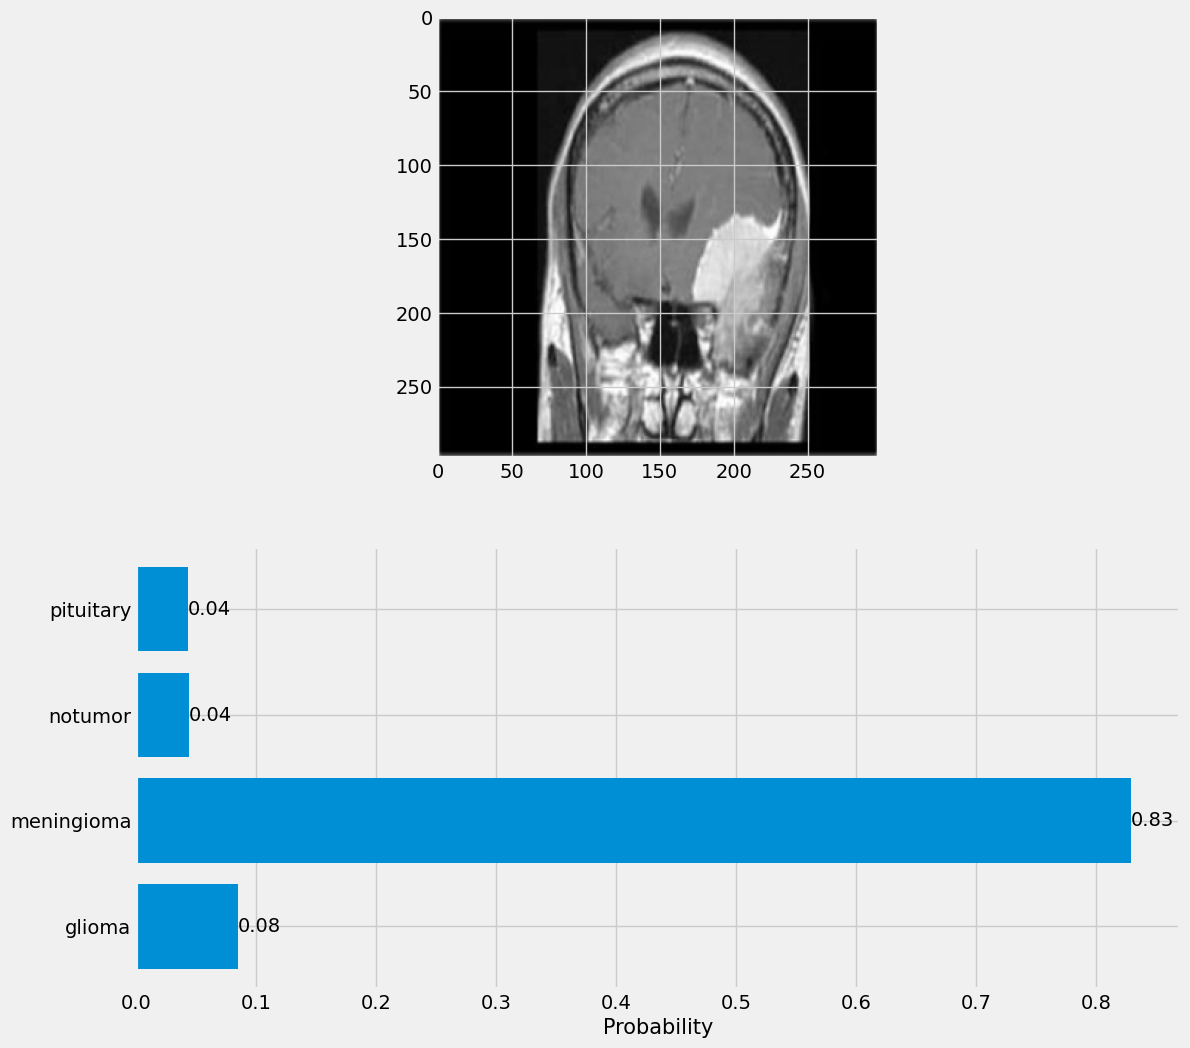

In [ ]:
predict('/content/Testing/meningioma/Te-meTr_0000.jpg')

In [ ]:
import shutil
import os
from IPython.display import FileLink

# Save the model (assuming you have a Keras model called `model`)
model.save('my_model.h5')

